In [29]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.analysis import Analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/MachineLearningRating_v3.txt',delimiter='|')

C:\Users\hanna\AppData\Local\Temp\ipykernel_36648\433989919.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt',delimiter='|')


### Data Summarization

In [31]:
df.shape

(1000098, 52)

In [32]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [34]:
df.describe(include='object')

,TransactionMonth,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,MainCrestaZone,SubCrestaZone,ItemType,VehicleType,make,Model,bodytype,VehicleIntroDate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
count,1000098,1000098,1000098,1000098,1000098,854137,959866,991839,990562,1000098,1000098,1000098,1000098,1000098,999546,999546,999546,999546,999546,1000098,1000098,1000096,846803,358197,358197,358197,698,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,23,4,6,5,1,11,3,3,3,1,9,16,45,1,5,46,411,13,174,2,2,1011,2,2,2,2,1,2,13,28,22,14,5,4,1,1
top,2015-08-01 00:00:00,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,Transvaal (all except Pretoria),Johannesburg,Mobility - Motor,Passenger Vehicle,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,B/S,4/2012,Yes,No,0,More than 6 months,No,No,No,No,Monthly,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
freq,106747,895210,911929,933555,1000098,260811,597938,986208,940990,1000098,393865,296187,176020,1000098,933598,813280,186087,844400,287638,999861,656617,665918,845223,358165,358165,358110,698,999554,791235,104158,104183,824124,828125,915028,1000098,1000098


In [35]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

C:\Users\hanna\AppData\Local\Temp\ipykernel_36648\3699093263.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


In [36]:
# df['SumInsured','CalculatedPremiumPerTerm','TotalPremium','TotalClaims'].describe()
selected_cols = ['TotalPremium', 'TotalClaims', 'SumInsured','CalculatedPremiumPerTerm']
df[selected_cols].describe()

,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05,1.178757e+02
std,2.302845e+02,2.384075e+03,1.508332e+06,3.997017e+02
min,-7.825768e+02,-1.200241e+04,1.000000e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+03,3.224800e+00
50%,2.178333e+00,0.000000e+00,7.500000e+03,8.436900e+00
75%,2.192982e+01,0.000000e+00,2.500000e+05,9.000000e+01
max,6.528260e+04,3.930921e+05,1.263620e+07,7.442217e+04


### Data Quality Assessment

In [37]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [38]:
(df.isnull().sum() / len(df)) * 100


UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity                 0.055195
kilowatts                

In [39]:
df.drop(columns=['NumberOfVehiclesInFleet','CrossBorder'], inplace=True)

### Univariate Analysis

In [40]:
analysis = Analysis(df)

- Numerical columns

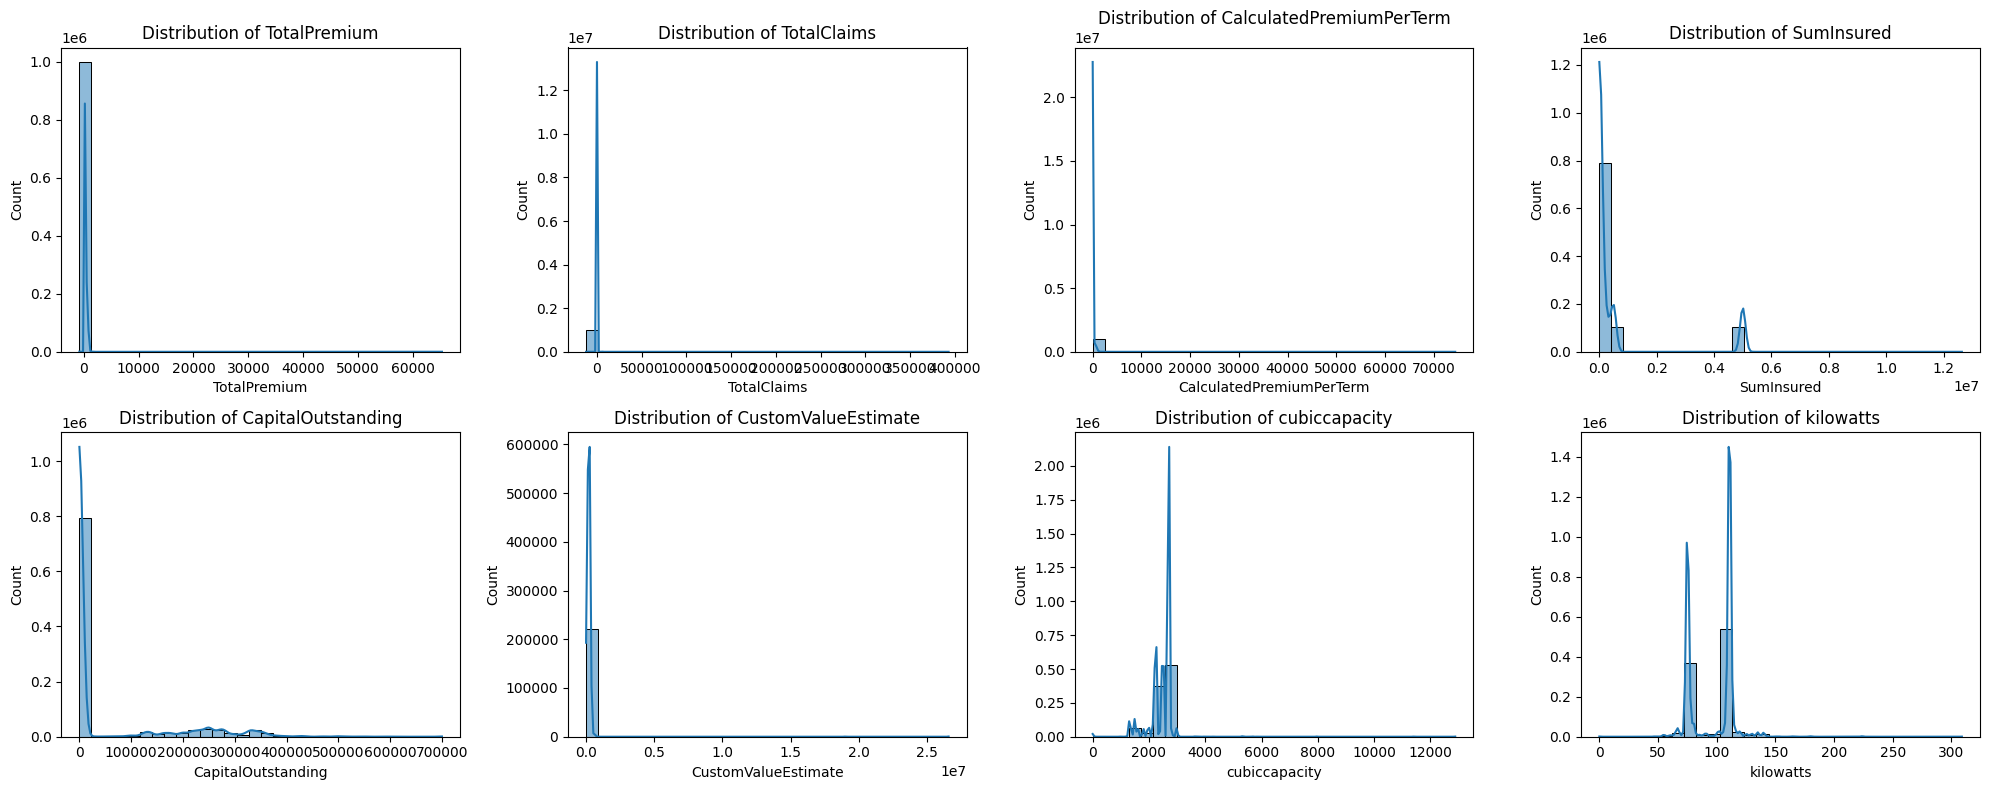

In [41]:
numerical = [
    'TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm',
    'SumInsured', 'CapitalOutstanding', 'CustomValueEstimate',
    'cubiccapacity', 'kilowatts'
]

analysis.plot_univariate_numerical(numerical)

- Categorical columns

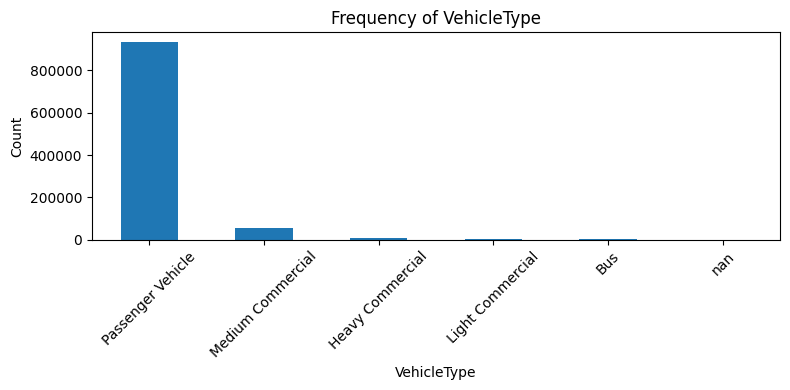

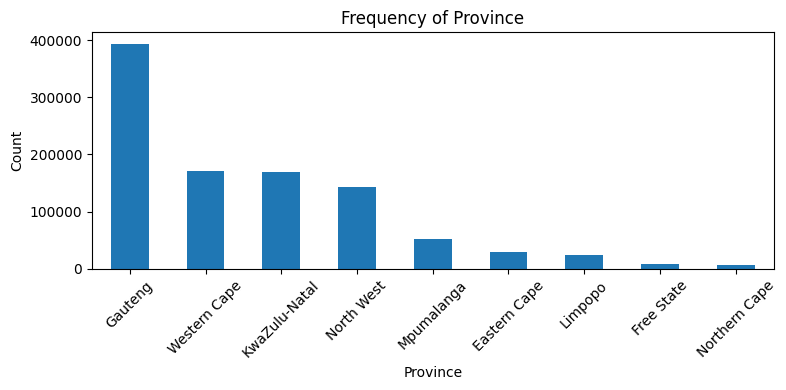

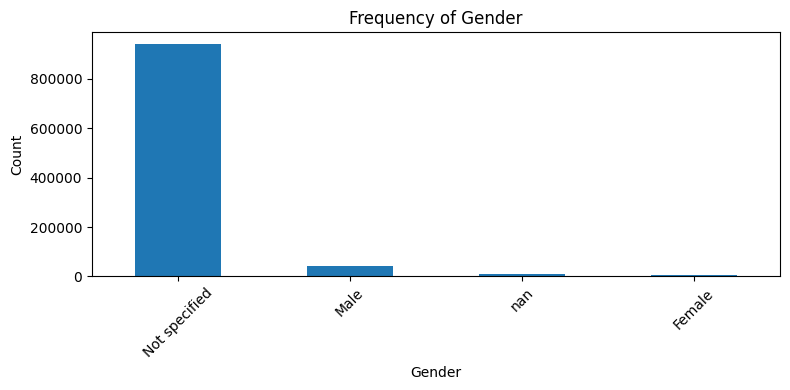

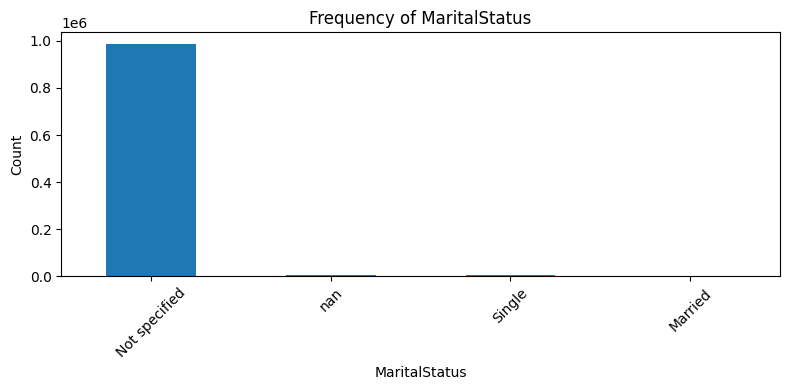

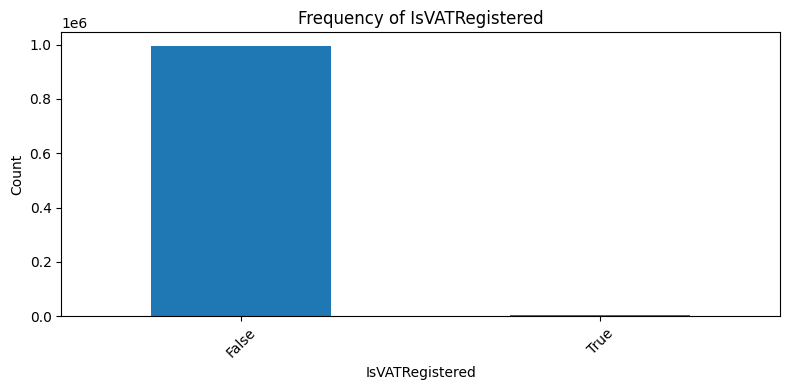

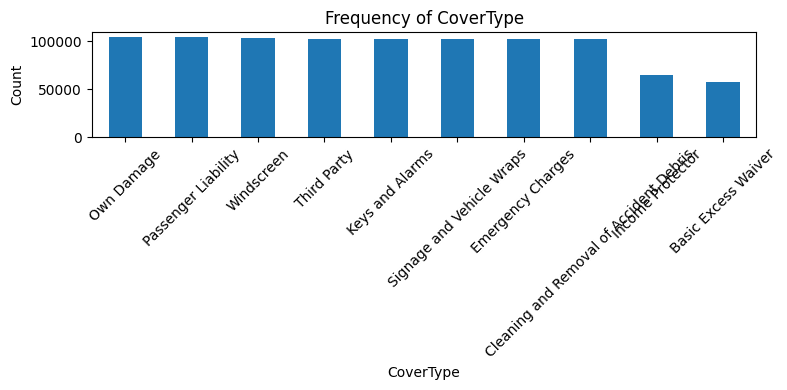

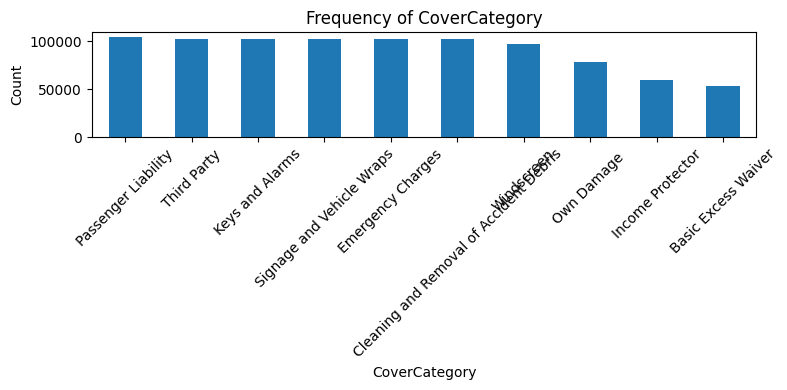

In [44]:
categorical = [
    'VehicleType', 'Province', 'Gender', 'MaritalStatus', 
    'IsVATRegistered', 'CoverType', 'CoverCategory'
]
analysis.plot_univariate_catergorical(categorical)

### Bivariate or Multivariate Analysis:

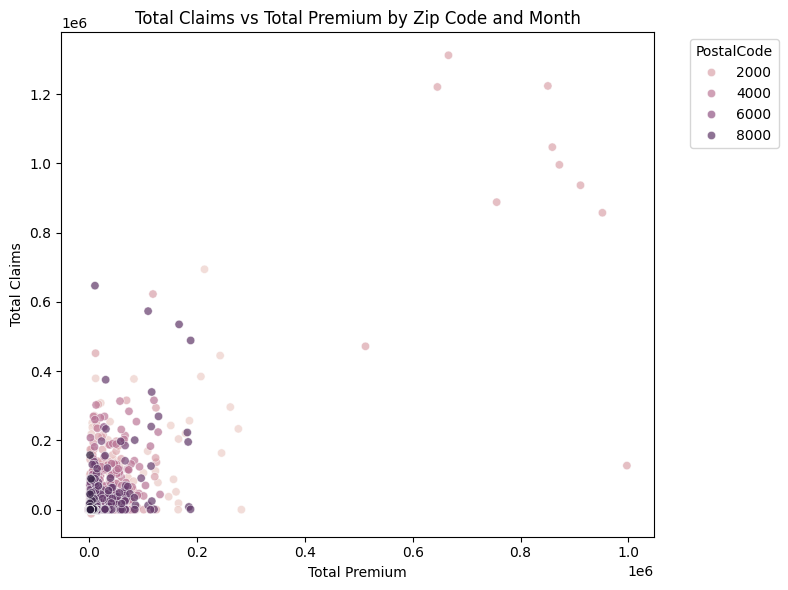

In [47]:
analysis.plot_multivariate()

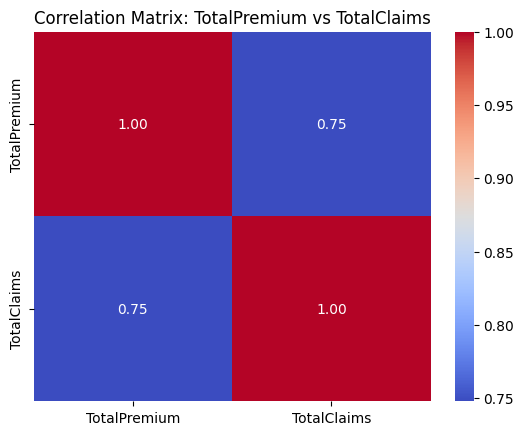

In [48]:
analysis.plot_corr_mat()

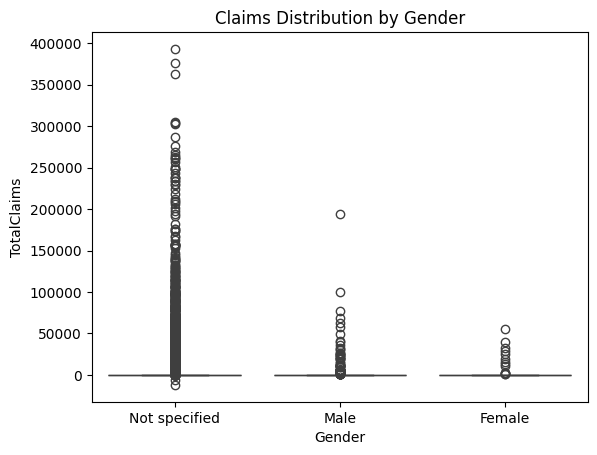

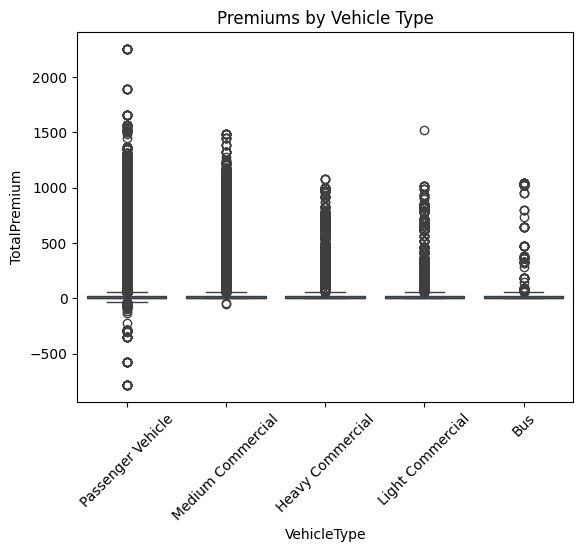

In [50]:
analysis.plot_vehicle_premium()

### Data Comparison

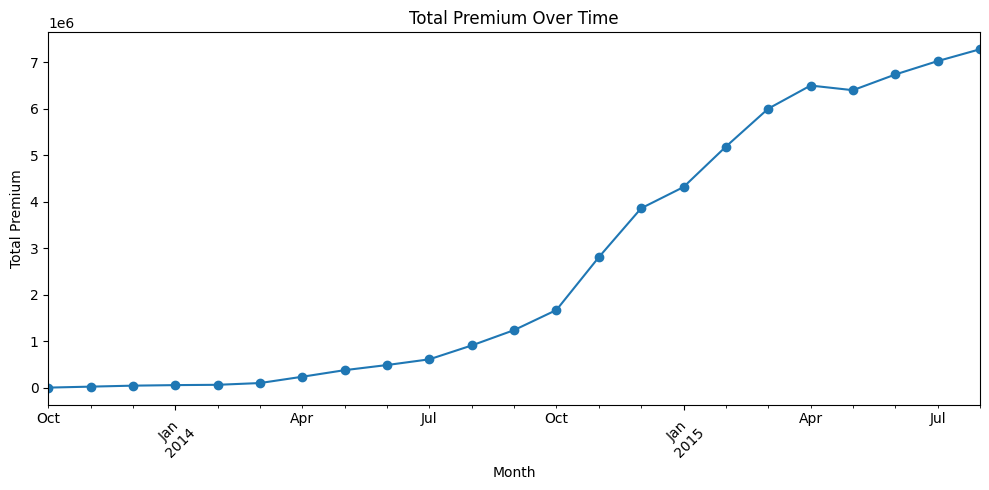

In [51]:
analysis.plot_premium_trend()

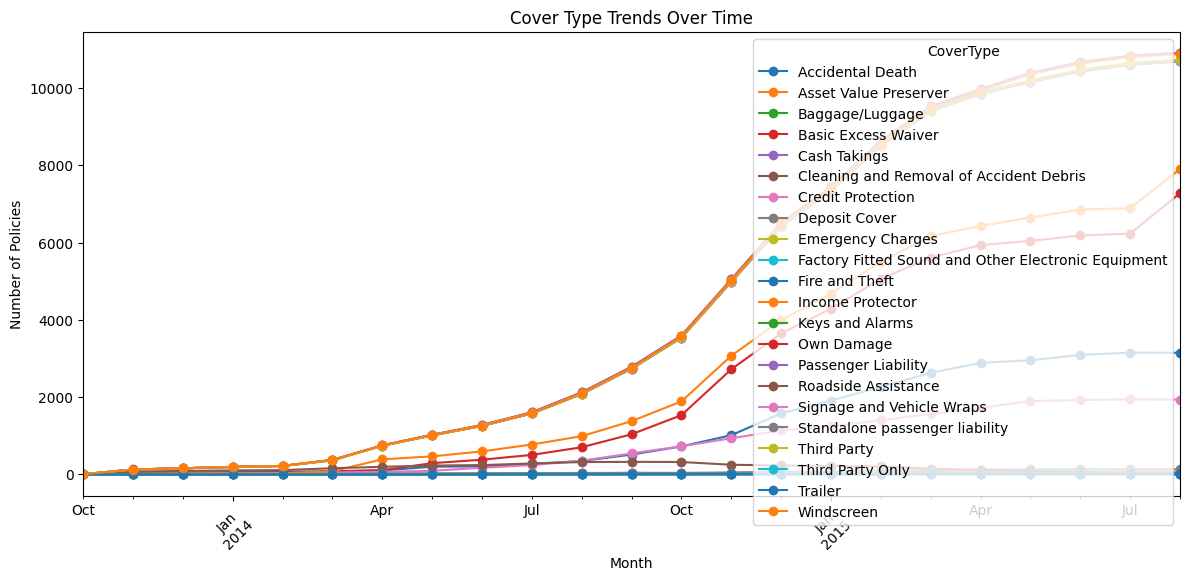

In [52]:
analysis.plot_cover_Trend()

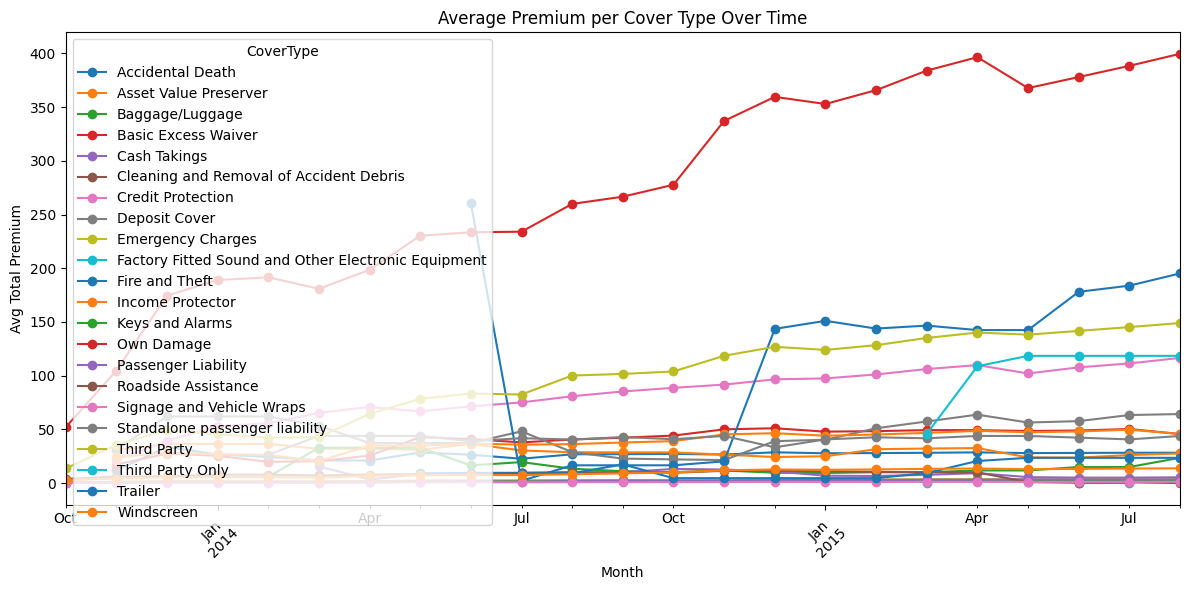

In [53]:
analysis.plot_av_premium_per_cover()

### Outlier Detection

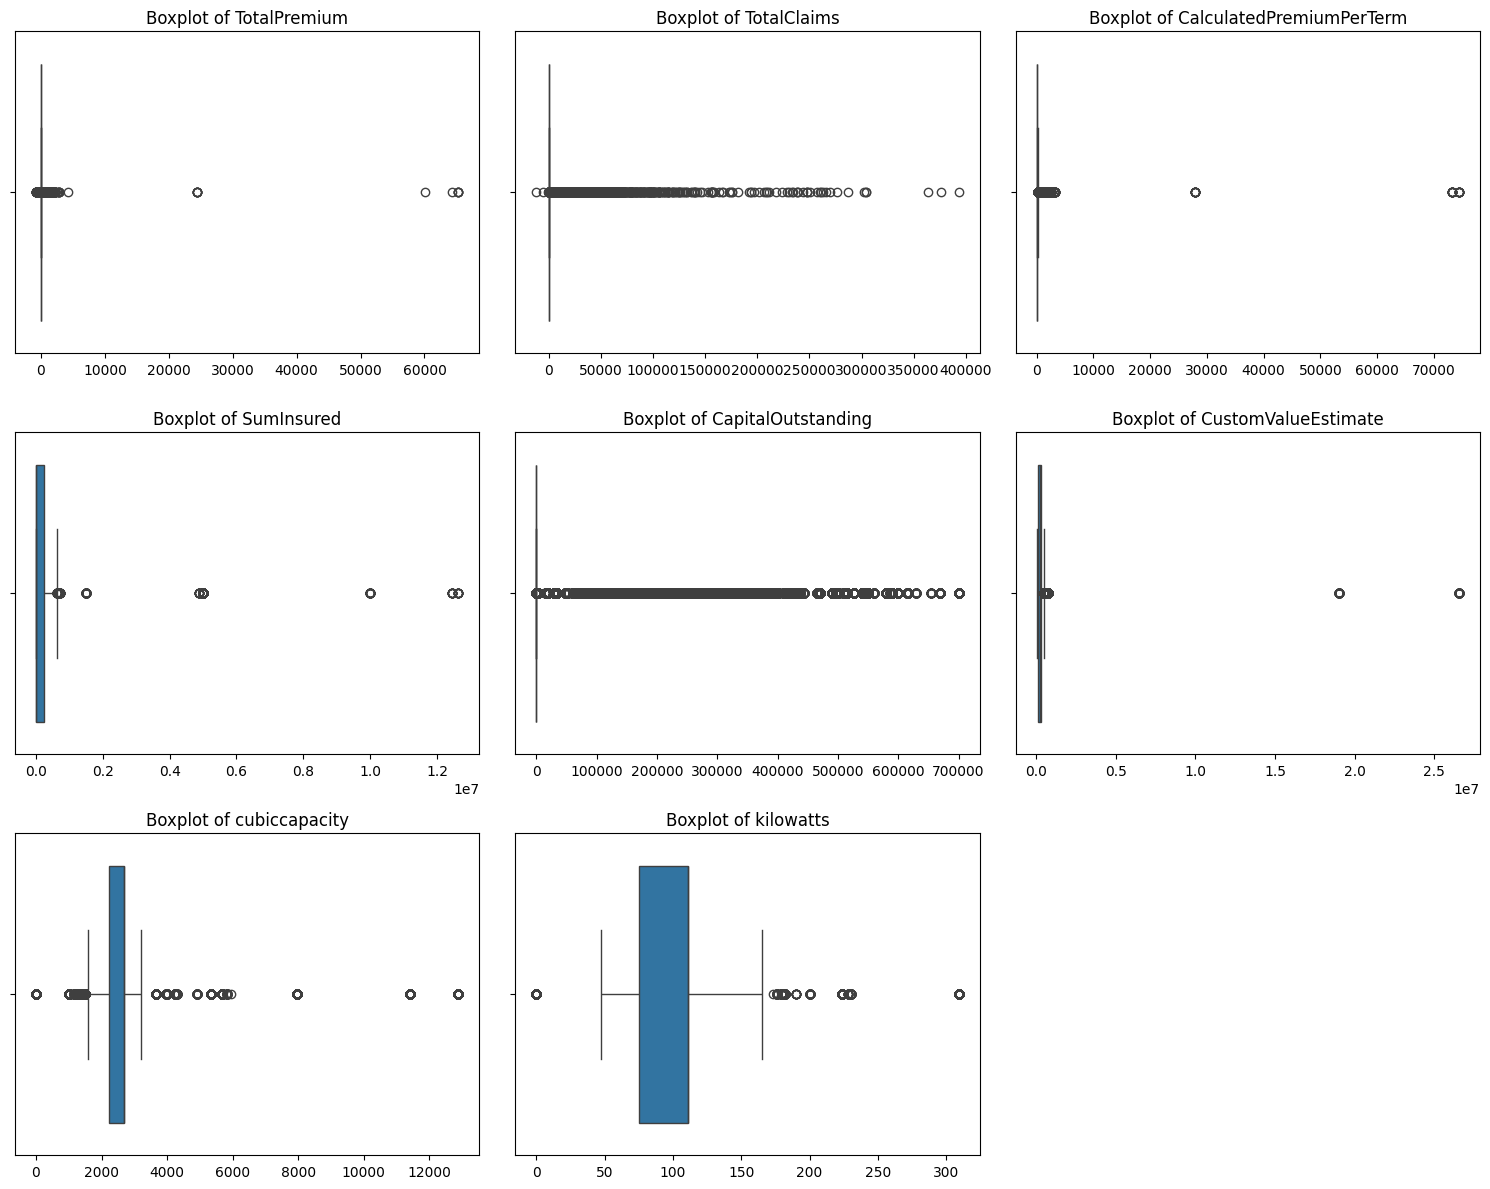

In [55]:
analysis.plot_box_plots(numerical)